In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Rieko00/psd/main/Cuaca1th_2.csv',sep=';')
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,surabaya,2023-09-01T00:00:00,26.0,26.0,21.0,73.97,0.0,0,NaN,0,...,1012.0,27.4,10.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96935599999"
1,surabaya,2023-09-01T01:00:00,26.3,26.3,22.6,80.56,0.0,0,NaN,0,...,1012.4,44.5,7.7,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96933099999,96935099999,96935599999"
2,surabaya,2023-09-01T02:00:00,24.0,24.0,21.0,83.34,0.0,0,NaN,0,...,1011.0,27.4,5.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96935599999"
3,surabaya,2023-09-01T03:00:00,24.0,24.0,21.0,83.34,0.0,0,NaN,0,...,1011.0,27.4,5.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96935599999"
4,surabaya,2023-09-01T04:00:00,23.3,23.3,21.5,89.80,0.0,0,NaN,0,...,1011.3,34.9,5.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96935099999,96935599999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,surabaya,2024-10-01T19:00:00,31.0,35.4,22.9,62.01,0.0,0,NaN,0,...,1009.3,48.0,9.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96935099999,96935599999"
9524,surabaya,2024-10-01T20:00:00,30.3,34.3,22.8,64.19,0.0,0,NaN,0,...,1010.5,56.4,8.3,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96933099999,96935099999,96935599999"
9525,surabaya,2024-10-01T21:00:00,30.0,33.9,22.8,65.42,0.0,0,NaN,0,...,1010.8,49.4,8.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96933099999,96935099999,96935599999"
9526,surabaya,2024-10-01T22:00:00,28.4,32.6,23.9,76.38,0.0,0,NaN,0,...,1010.3,44.7,8.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"WARR,96935099999,96935599999"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              9528 non-null   object 
 1   datetime          9528 non-null   object 
 2   temp              9528 non-null   float64
 3   feelslike         9528 non-null   float64
 4   dew               9528 non-null   float64
 5   humidity          9528 non-null   float64
 6   precip            9528 non-null   float64
 7   precipprob        9528 non-null   int64  
 8   preciptype        1746 non-null   object 
 9   snow              9528 non-null   int64  
 10  snowdepth         9528 non-null   int64  
 11  windgust          9528 non-null   float64
 12  windspeed         9528 non-null   float64
 13  winddir           9528 non-null   float64
 14  sealevelpressure  9528 non-null   float64
 15  cloudcover        9528 non-null   float64
 16  visibility        9528 non-null   float64


In [4]:
df.drop(columns=['stations', 'icon', 'severerisk', 'uvindex', 'solarenergy', 'solarradiation', 'sealevelpressure', 'snowdepth', 'snow', 'preciptype', 'precipprob', 'precip', 'name', 'datetime'], inplace=True)
df

,temp,feelslike,dew,humidity,windgust,windspeed,winddir,cloudcover,visibility,conditions
0,26.0,26.0,21.0,73.97,18.0,3.6,140.0,27.4,10.0,Partially cloudy
1,26.3,26.3,22.6,80.56,14.4,6.9,158.0,44.5,7.7,Partially cloudy
2,24.0,24.0,21.0,83.34,11.2,7.6,220.0,27.4,5.0,Partially cloudy
3,24.0,24.0,21.0,83.34,8.6,3.6,180.0,27.4,5.0,Partially cloudy
4,23.3,23.3,21.5,89.80,6.5,4.8,247.0,34.9,5.0,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...
9523,31.0,35.4,22.9,62.01,28.4,23.5,120.0,48.0,9.0,Partially cloudy
9524,30.3,34.3,22.8,64.19,27.7,12.1,117.0,56.4,8.3,Partially cloudy
9525,30.0,33.9,22.8,65.42,22.0,8.1,113.0,49.4,8.0,Partially cloudy
9526,28.4,32.6,23.9,76.38,20.5,12.4,87.0,44.7,8.0,Partially cloudy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        9528 non-null   float64
 1   feelslike   9528 non-null   float64
 2   dew         9528 non-null   float64
 3   humidity    9528 non-null   float64
 4   windgust    9528 non-null   float64
 5   windspeed   9528 non-null   float64
 6   winddir     9528 non-null   float64
 7   cloudcover  9528 non-null   float64
 8   visibility  9528 non-null   float64
 9   conditions  9528 non-null   object 
dtypes: float64(9), object(1)
memory usage: 744.5+ KB


In [6]:
df['conditions'].unique()

array(['Partially cloudy', 'Rain, Partially cloudy', 'Clear', 'Overcast',
       'Rain, Overcast', 'Rain'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'conditions' column
df['conditions_encoded'] = label_encoder.fit_transform(df['conditions'])

# Drop the original 'conditions' column
df.drop(columns=['conditions'], inplace=True)

df

,temp,feelslike,dew,humidity,windgust,windspeed,winddir,cloudcover,visibility,conditions_encoded
0,26.0,26.0,21.0,73.97,18.0,3.6,140.0,27.4,10.0,2
1,26.3,26.3,22.6,80.56,14.4,6.9,158.0,44.5,7.7,2
2,24.0,24.0,21.0,83.34,11.2,7.6,220.0,27.4,5.0,2
3,24.0,24.0,21.0,83.34,8.6,3.6,180.0,27.4,5.0,2
4,23.3,23.3,21.5,89.80,6.5,4.8,247.0,34.9,5.0,2
...,...,...,...,...,...,...,...,...,...,...
9523,31.0,35.4,22.9,62.01,28.4,23.5,120.0,48.0,9.0,2
9524,30.3,34.3,22.8,64.19,27.7,12.1,117.0,56.4,8.3,2
9525,30.0,33.9,22.8,65.42,22.0,8.1,113.0,49.4,8.0,2
9526,28.4,32.6,23.9,76.38,20.5,12.4,87.0,44.7,8.0,2


In [8]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [9]:
# # prompt: encoding arah angin ke angka

# def encode_arah_angin(arah_angin):
#   if arah_angin == 'N':
#     return 0
#   elif arah_angin == 'NE':
#     return 1
#   elif arah_angin == 'E':
#     return 2
#   elif arah_angin == 'SE':
#     return 3
#   elif arah_angin == 'S':
#     return 4
#   elif arah_angin == 'SW':
#     return 5
#   elif arah_angin == 'W':
#     return 6
#   elif arah_angin == 'NW':
#     return 7
#   else:
#     return -1  # Or handle unknown values as needed

# df['arah_angin_encoded'] = df['arah_angin'].apply(encode_arah_angin)
# df.drop(columns=['arah_angin'], inplace=True)
# df

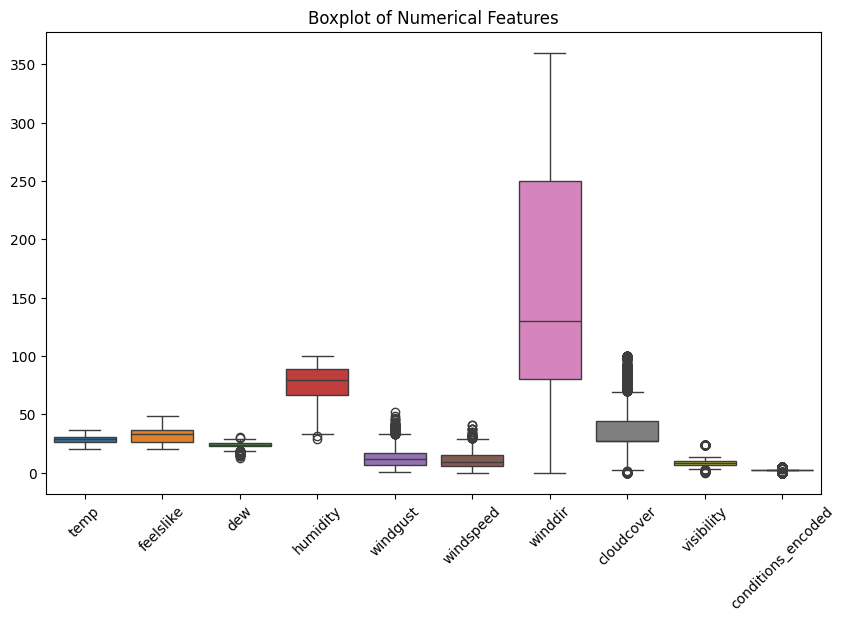

In [10]:
# prompt: boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [11]:
# # Define the thresholds for each numerical column
# thresholds = {
#     'humidity': (df['humidity'].quantile(0.05), df['humidity'].quantile(0.95)),
#     'windspeed': (df['windspeed'].quantile(0.05), df['windspeed'].quantile(0.95)),
#     'dew': (df['dew'].quantile(0.05), df['dew'].quantile(0.95)),
#     'windgust': (df['windgust'].quantile(0.05), df['windgust'].quantile(0.95)),
#     'cloudcover': (df['cloudcover'].quantile(0.05), df['cloudcover'].quantile(0.95)),
#     'visibility': (df['visibility'].quantile(0.05), df['visibility'].quantile(0.95)),
#     # Add more columns as needed
# }

# # Apply the thresholds to cap the values
# for column, (lower, upper) in thresholds.items():
#     df[column] = df[column].clip(lower, upper)

# # Display the dataframe to verify the changes
# df

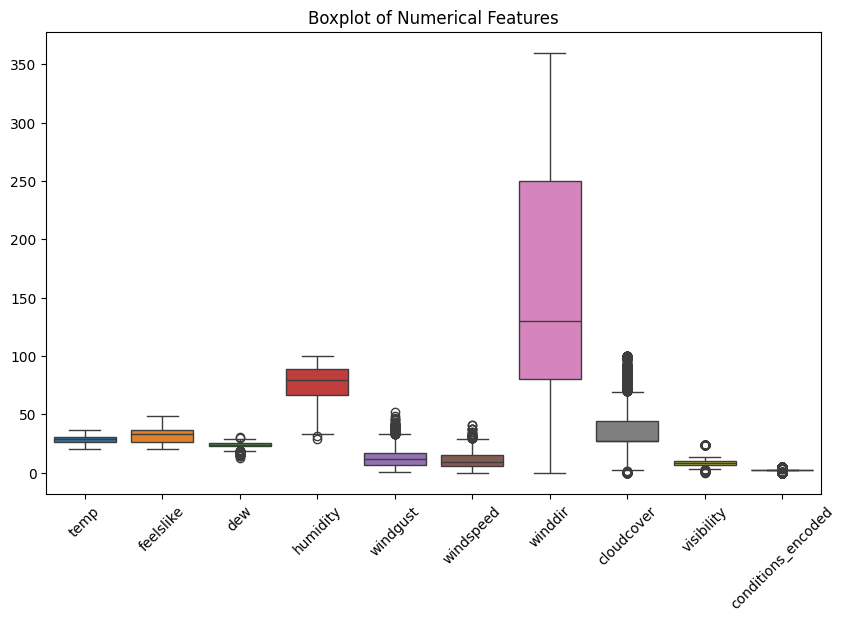

In [12]:
# prompt: boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

Xdata = df.drop('conditions_encoded', axis=1)
ydata = df['conditions_encoded']

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7622, 9)
X_test shape: (1906, 9)
y_train shape: (7622,)
y_test shape: (1906,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="gini", bootstrap=True, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8929695697796433
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       0.89      0.73      0.80        11
           2       0.90      0.99      0.94      1641
           4       0.40      0.67      0.50         3
           5       0.38      0.07      0.12       190

    accuracy                           0.89      1906
   macro avg       0.71      0.69      0.67      1906
weighted avg       0.85      0.89      0.86      1906



In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)*100

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print("Mean Absolute Percentage Error (MAPE):", mape ,"%")

Mean Squared Error: 0.9606505771248688
Root Mean Squared Error: 0.9801278371339469
Mean Absolute Percentage Error (MAPE): 7.914480587618048 %


In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Feature Scaling (for KNN and SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))


# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels (linear, rbf, poly)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm, zero_division=0))

KNN Accuracy: 0.8819517313746065
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        61
           1       0.88      0.64      0.74        11
           2       0.89      0.98      0.93      1641
           4       0.00      0.00      0.00         3
           5       0.27      0.05      0.08       190

    accuracy                           0.88      1906
   macro avg       0.61      0.49      0.53      1906
weighted avg       0.83      0.88      0.85      1906



C:\Users\ariek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ariek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ariek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

SVM Accuracy: 0.8966421825813221
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.89      0.73      0.80        11
           2       0.89      1.00      0.94      1641
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       190

    accuracy                           0.90      1906
   macro avg       0.56      0.54      0.55      1906
weighted avg       0.81      0.90      0.85      1906



In [17]:
# prompt: evaluasi skor dengan cv

from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,bootstrap=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # You can change cv to adjust the number of folds

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the average cross-validation score
print("Average cross-validation score:", np.mean(cv_scores))

NameError: name 'X' is not defined

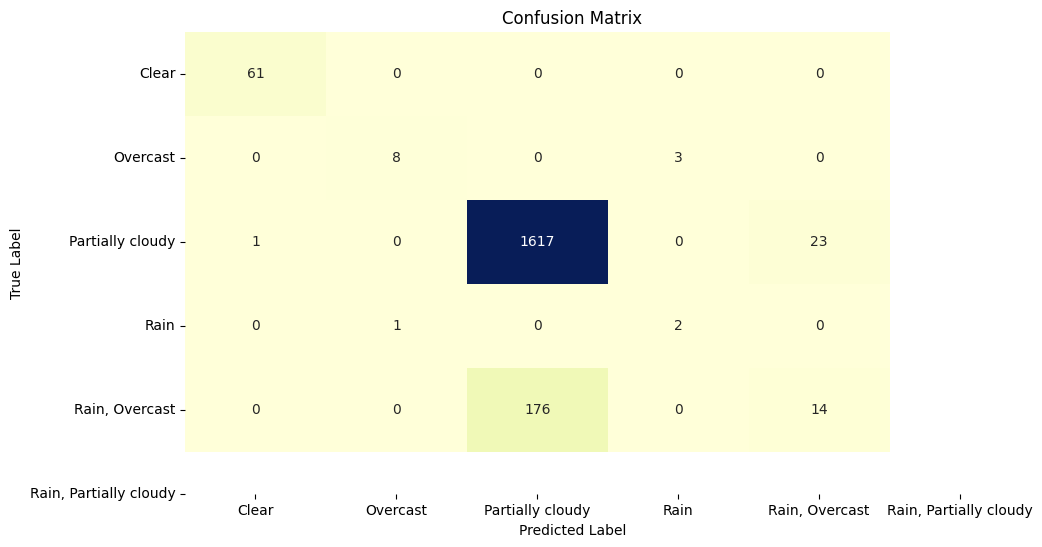

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Menambahkan label dan judul
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Menampilkan plot
plt.show()

In [46]:
def grid_search_rf(input_df, target_df, params):
    best_accuracy = float('inf')
    best_params = None
    history = []
    i = 0
    for split in params['splits']:
        x_train, y_train, x_test, y_test = train_test_split(input_df, target_df, train_size=split, random_state=42)
        for estimator in params['n_estimators']:
            for criterion in params['criterion']:
                for max_depth in params['max_depth']:
                    for min_samples_split in params['min_samples_split']:
                        for min_samples_leaf in params['min_samples_leaf']:
                            for max_features in params['max_features']:
                                model = RandomForestClassifier(n_estimators=estimator, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=42)
                                model.fit(x_train, y_train.values)
                                y_pred = model.predict(x_test)
                                accuracy = accuracy_score(y_test, y_pred)
                                print(f'Iterasi ke-{i} - Accuracy: {accuracy} - n_estimators: {estimator} - criterion: {criterion} - max_depth: {max_depth} - min_samples_split: {min_samples_split} - min_samples_leaf: {min_samples_leaf} - max_features: {max_features}')
                                history.append([i, split, estimator, criterion, max_depth, min_samples_split, min_samples_leaf, max_features, accuracy])
                                i+=1
                                if accuracy < best_accuracy:
                                    best_rmse = accuracy
                                    best_model = model
                                    best_params = {'estimator': estimator, 'criterion': criterion, 'train_sample': split, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}

    history_rf = pd.DataFrame(history, columns=['Iterasi', 'Split', 'Estimator', 'Criterion', 'Max Depth', 'Min Samples Split', 'Min Samples Leaf', 'Max Features', 'Accuracy'])
    return best_params, best_rmse, best_model, history_rf


parameters = {
    'splits' : [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# parameters = {
#     'splits' : [0.7, 0.8, 0.9],
#     'n_estimators': [50, 100],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2'],
#     'criterion': ['squared_error', 'absolute_error']
# }


# Ensure X and y have the same number of samples
# X, y = X.align(y, join='inner', axis=0)

# best_params, best_rmse, best_model_rf, history_rf = grid_search_rf(Xdata, ydata, parameters)
print (Xdata)



      temp  feelslike   dew  humidity  windgust  windspeed  winddir  \
0     26.0       26.0  21.0     73.97      18.0        3.6    140.0   
1     26.3       26.3  22.6     80.56      14.4        6.9    158.0   
2     24.0       24.0  21.0     83.34      11.2        7.6    220.0   
3     24.0       24.0  21.0     83.34       8.6        3.6    180.0   
4     23.3       23.3  21.5     89.80       6.5        4.8    247.0   
...    ...        ...   ...       ...       ...        ...      ...   
9523  31.0       35.4  22.9     62.01      28.4       23.5    120.0   
9524  30.3       34.3  22.8     64.19      27.7       12.1    117.0   
9525  30.0       33.9  22.8     65.42      22.0        8.1    113.0   
9526  28.4       32.6  23.9     76.38      20.5       12.4     87.0   
9527  29.5       34.6  24.2     73.19      16.9        4.4     90.0   

      cloudcover  visibility  
0           27.4        10.0  
1           44.5         7.7  
2           27.4         5.0  
3           27.4       